In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from nbodykit.lab import *
from nbodykit import setup_logging, style

import os
import matplotlib.pyplot as plt
plt.style.use(style.notebook)

import numpy as np
import math
import statistics

#from scipy import stats
#import pandas as pd

In [3]:
setup_logging() # turn on logging to screen

In [4]:
# Setting variables and parameters:
#sim_name = "F6_Box1_27"

file_name = "Rockstar_M200c_F6_B1_B1024_NP1024_S27.dat"
prefix_name = "../../../../halo_catalogues/"
sim_name = "F6"
box_name = "box1"
snap_name = "27"

sim_name_save = sim_name+"_"+box_name+"_"+snap_name

#box_name = "../../../../halo_catalogues/F6/box1/27/Rockstar_M200c_F6_B1_B1024_NP1024_S27.dat"

file_path_name = prefix_name+sim_name+"/"+box_name+"/"+snap_name+"/"+file_name

save_name = "./"
LBox = 1024.0
Nparticles = 1024*1024*1024
print(Nparticles)

1073741824


In [5]:
# Reading files
inputFile = np.loadtxt(file_path_name)

massvec=inputFile[:,2]
npvec=inputFile[:,7]
xvec=inputFile[:,8]
yvec=inputFile[:,9]
zvec=inputFile[:,10]
nval=massvec.shape[0]
npvecsum = np.sum(npvec)
print(nval)
print(npvecsum)
print(npvecsum/Nparticles)

2088610
272286591.0
0.2535866489633918


In [6]:
for i in range(0,nval):
    xvec[i] = xvec[i]/LBox
    yvec[i] = yvec[i]/LBox
    zvec[i] = zvec[i]/LBox

In [7]:
massmax = np.amax(massvec)
massmin = np.amin(massvec)
#print('mass minimum:',massmin)
#print('mass maximum:',massmax)

print('mass minimum:','%e' % massmin)
print('mass maximum:','%e' % massmax)

npmin = np.min(npvec)
npmax = np.max(npvec)
print('np minimum:','%e' % npmin)
print('np maximum:','%e' % npmax)

('mass minimum:', '1.560000e+11')
('mass maximum:', '1.600000e+15')
('np minimum:', '2.000000e+01')
('np maximum:', '1.956300e+04')


In [11]:
#yf = 15.5
#yi = 10.5

yf = np.log10(massmax)
yi = np.log10(massmin)

Ny = 30
dy = (yf-yi)/int(Ny)
yarray = np.arange(yi,yf,dy)
xarray = np.arange(yi,yf,dy)

print(dy)
print(yarray)

for i in range(0,Ny):
    xarray[i] = np.power(10.0,yarray[i])

print(xarray)
print(yarray.size, xarray.size)

0.1336998461433821
[11.1931246  11.32682444 11.46052429 11.59422414 11.72792398 11.86162383
 11.99532368 12.12902352 12.26272337 12.39642321 12.53012306 12.66382291
 12.79752275 12.9312226  13.06492244 13.19862229 13.33232214 13.46602198
 13.59972183 13.73342168 13.86712152 14.00082137 14.13452121 14.26822106
 14.40192091 14.53562075 14.6693206  14.80302044 14.93672029 15.07042014]
[1.56000000e+11 2.12238635e+11 2.88751528e+11 3.92847629e+11
 5.34470800e+11 7.27149700e+11 9.89290128e+11 1.34593325e+12
 1.83114766e+12 2.49128386e+12 3.38940183e+12 4.61129500e+12
 6.27368562e+12 8.53537484e+12 1.16124122e+13 1.57987341e+13
 2.14942421e+13 2.92430039e+13 3.97852260e+13 5.41279619e+13
 7.36413127e+13 1.00189306e+14 1.36307959e+14 1.85447533e+14
 2.52302124e+14 3.43258067e+14 4.67003997e+14 6.35360840e+14
 8.64411011e+14 1.17603470e+15]
(30, 30)


In [9]:
## Generate data on commute times.
#size, scale = 20, 10
#print(np.random.gamma(scale, size=size) ** 1.5)
#commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)
#commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
#                   color='#607c8e')
#plt.title('Commute Times for 1,000 Commuters')
#plt.xlabel('Counts')
#plt.ylabel('Commute Time')
#plt.grid(axis='y', alpha=0.75)

In [19]:
#massbins = [1.0e11,1.0e12,1.0e13,1.0e14,1.0e15]
#massbins = [0.5e11,1.0e11,0.5e12,1.0e12,0.5e13,1.0e13,0.5e14,1.0e14,0.5e15,1.0e15]
massbins = xarray

masshisto, bin_edges = np.histogram(massvec,bins=massbins)
#masshisto= np.histogram(massvec,bins=massbins)

print(bin_edges)
print(masshisto)
print(bin_edges.size,masshisto.size)

binarray = np.arange(masshisto.size)
print(binarray.size)

for i in range(0,masshisto.size):
    binarray[i] = (bin_edges[i+1]+bin_edges[i])/2.0

#    binarray[i] = bin_edges[i]


    
print(binarray)

# Saving to file m x y z
# (1) (2) (3) (4)
# x y z mass
arrayhista=np.array([binarray,masshisto])
arrayhistb=np.transpose(arrayhista)
print arrayhistb

#array_txt_name = save_name+'halos_mxyz_'+sim_name_save+'.dat'
hist_dat_name = save_name+'halos_mass_hist_'+sim_name_save+'.dat'

#nvalstr = str(nval)
#np.savetxt(array_txt_name,arrayb,delimiter='\t',header=nvalstr,newline='\r\n')
np.savetxt(hist_dat_name,arrayhistb,delimiter='\t',newline='\r\n')

##commutes = pd.Series(masshisto)
#commutes = pd.Series(massvec)
#print(commutes)
#commutes.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
#plt.title('Commute Times for 1,000 Commuters')
#plt.xlabel('Counts')
#plt.ylabel('Commute Time')
#plt.grid(axis='y', alpha=0.75)


[1.56000000e+11 2.12238635e+11 2.88751528e+11 3.92847629e+11
 5.34470800e+11 7.27149700e+11 9.89290128e+11 1.34593325e+12
 1.83114766e+12 2.49128386e+12 3.38940183e+12 4.61129500e+12
 6.27368562e+12 8.53537484e+12 1.16124122e+13 1.57987341e+13
 2.14942421e+13 2.92430039e+13 3.97852260e+13 5.41279619e+13
 7.36413127e+13 1.00189306e+14 1.36307959e+14 1.85447533e+14
 2.52302124e+14 3.43258067e+14 4.67003997e+14 6.35360840e+14
 8.64411011e+14 1.17603470e+15]
[     0  81643 113986  43538 105282  90092 130210 132692 159472 226933
 245741 188414 134818  95506  71590  51791  36836  25454  17137  10995
   7072   4339   2500   1260    679    307    129     37     14]
(30, 29)
29
[    184119317659     250495081512     340799578554     463659214549
     630810249675     858219913695    1167611687734    1588540456330
    2161215760263    2940342843519    4000348413329    5442490307992
    7404530228890   10073893531797   13705573176543   18646488123452
   25368623030892   34514114948761   469565939

In [20]:
##dist = pd.DataFrame(masshisto)
#dist = pd.DataFrame(massvec)
##dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)
#
#print(dist)
#
#fig, ax = plt.subplots()
#dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
#dist.plot.hist(density=True, ax=ax)
#ax.set_ylabel('Probability')
#ax.grid(axis='y')
#ax.set_facecolor('#d8dcd6')

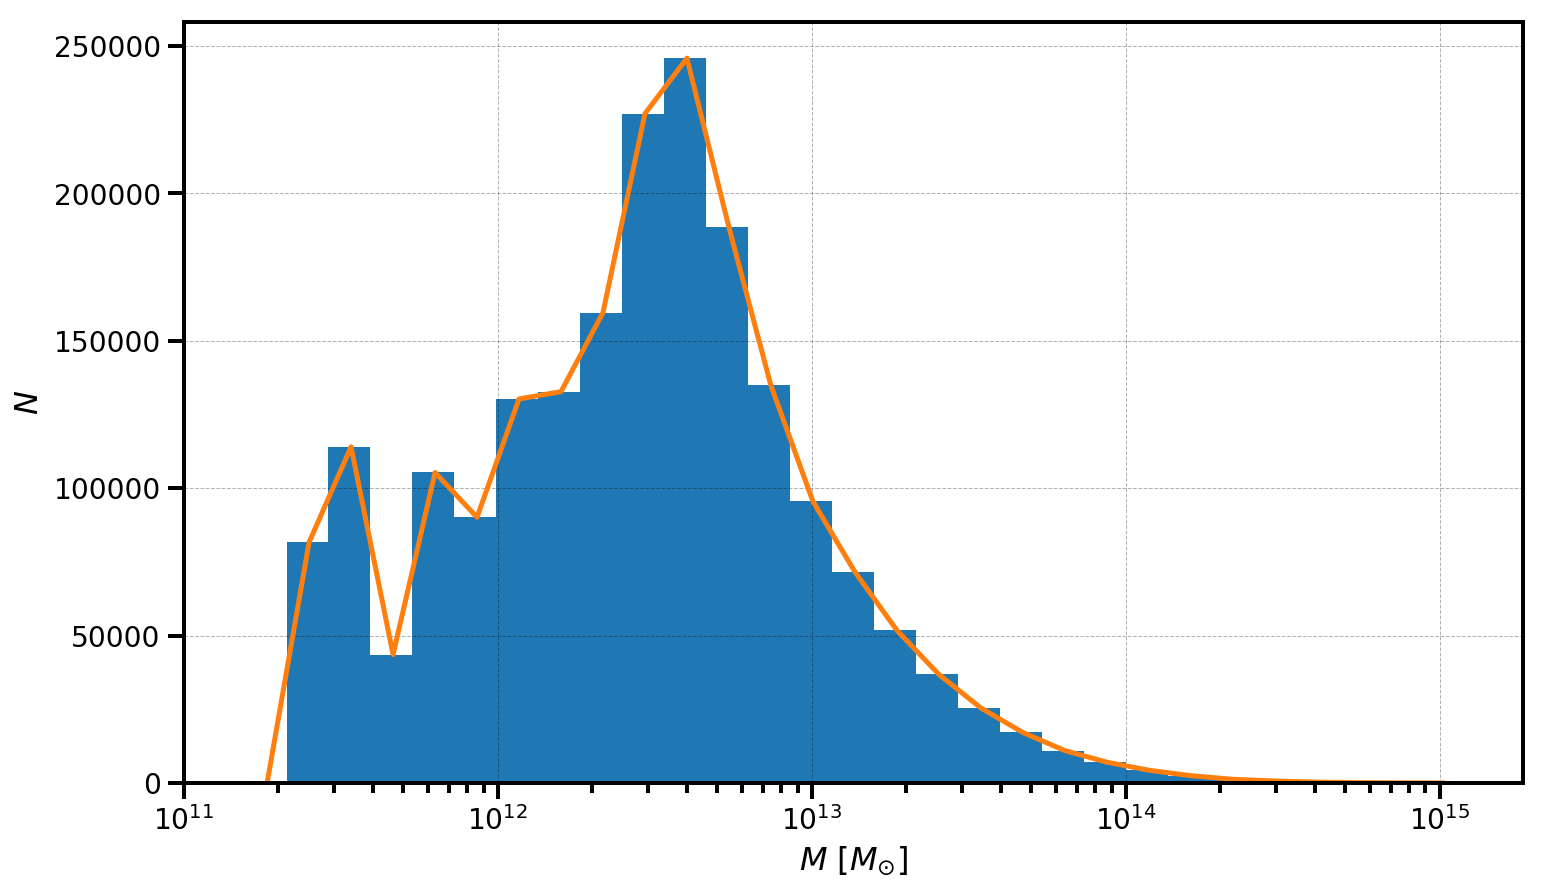

In [21]:
fig1 = plt.figure()

#plt.hist(massvec, bins='auto')
plt.hist(massvec, bins=xarray)
#plt.hist(masshisto)
plt.plot(binarray, masshisto)


plt.xlabel(r"$M$ [$M_{\odot}$]")
plt.ylabel(r"$N$")
#plt.xlim(0.005, 0.6)
#plt.xlim(0.01, 10.0)
#plt.ylim(1,100000)
plt.xscale('log')
#plt.yscale('log')

fig_txt_name = save_name+'halos_mass_hist_'+sim_name_save+'.pdf'

plt.savefig(fig_txt_name)

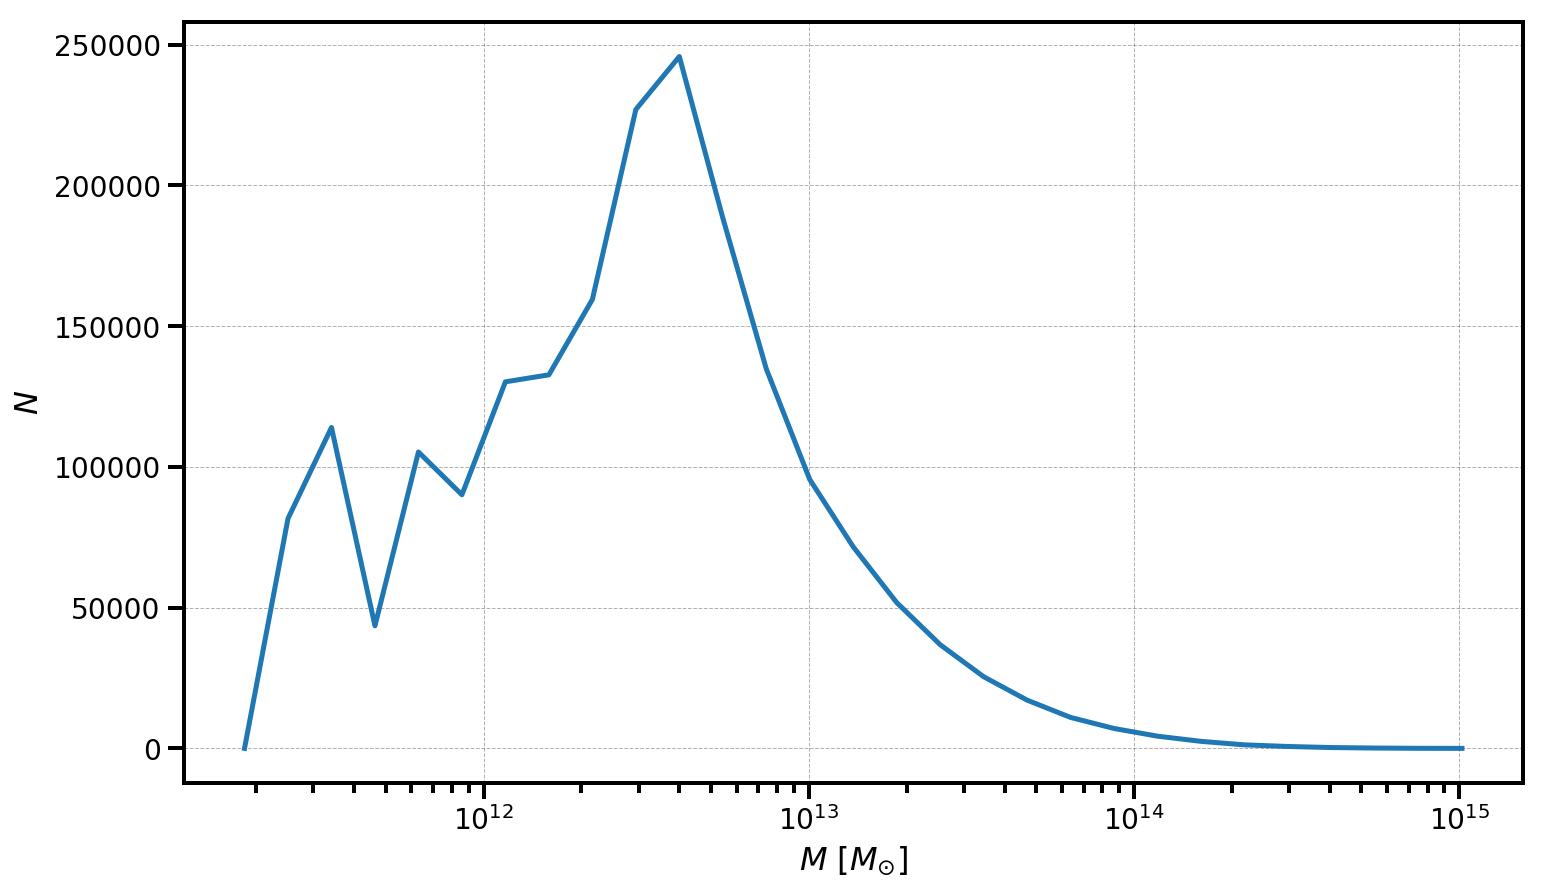

In [22]:
fig2 = plt.figure()

#plt.hist(massvec, bins='auto')
plt.plot(binarray, masshisto)
#plt.hist(masshisto)


plt.xlabel(r"$M$ [$M_{\odot}$]")
plt.ylabel(r"$N$")
#plt.xlim(0.005, 0.6)
#plt.xlim(0.01, 10.0)
#plt.ylim(1,100000)
plt.xscale('log')
#plt.yscale('log')

#fig_txt_name = save_name+'halos_mass_hist_'+sim_name_save+'.pdf'

#plt.savefig(fig_txt_name)

In [23]:
# Saving to file m x y z
# (1) (2) (3) (4)
# x y z mass
arraya=np.array([xvec,yvec,zvec,massvec])
arrayb=np.transpose(arraya)
print arrayb

array_txt_name = save_name+'halos_mxyz_'+sim_name_save+'.dat'

nvalstr = str(nval)
np.savetxt(array_txt_name,arrayb,delimiter='\t',header=nvalstr,newline='\r\n')

[[4.93604492e-03 2.72556543e-02 6.98085937e-03 2.88600000e+12]
 [3.25306641e-03 1.98036133e-03 8.56544922e-03 3.66500000e+12]
 [6.77268555e-03 2.33202930e-02 3.46047852e-03 1.40400000e+12]
 ...
 [9.88624873e-01 9.99260303e-01 9.87060664e-01 2.41800000e+12]
 [9.94689824e-01 9.86609463e-01 9.88502266e-01 1.56000000e+11]
 [9.93434727e-01 9.90697803e-01 9.88945488e-01 2.18400000e+12]]
